In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Y','Al','O'])

In [2]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif'

crystal_analyzer.read_cif(cif_file_path)


Atoms(symbols='Y4Al2O8', pbc=True, cell=[3.6451, 11.8743, 3.6451], spacegroup_kinds=...)

In [3]:
import numpy as np
crystal_analyzer.origin = np.array([831.26558017, 962.21710935, 0])
crystal_analyzer.a = np.array([ 31.26403339, -36.73158211,0])
crystal_analyzer.b = np.array([-118.32881689, -100.67459688,0])
crystal_analyzer.c = crystal_analyzer.unitcell.cell[2]


(array([[755.31741234, 897.60012609,   0.        ],
        [788.88493111, 926.15949573,   0.        ],
        [830.11383748, 929.57163347,   1.82255   ],
        [745.35253936, 857.45640624,   1.82255   ],
        [787.73318842, 893.51401986,   1.82255   ],
        [831.26558017, 962.21710935,   0.        ],
        [772.10117172, 911.87981091,   1.82255   ],
        [787.73318842, 893.51401986,   0.        ],
        [846.89759686, 943.85131829,   0.        ],
        [831.26558017, 962.21710935,   1.82255   ],
        [732.80417164, 878.44577729,   0.        ],
        [811.39817181, 945.31384453,   0.        ],
        [807.60059678, 910.41728467,   1.82255   ],
        [767.86578006, 876.61075504,   1.82255   ]]),
 array([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]))

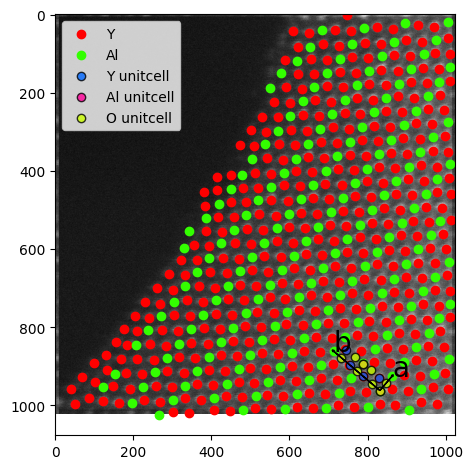

In [4]:
crystal_analyzer.unitcell_mapping()

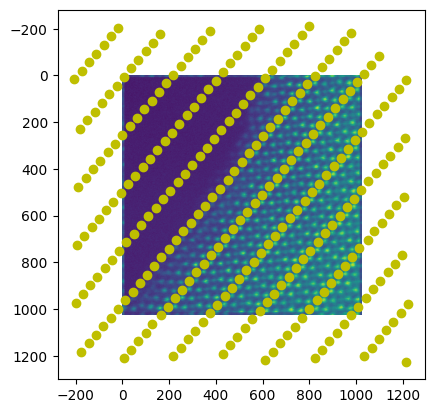

In [5]:
import matplotlib.pyplot as plt
shift_origin_adaptive = crystal_analyzer.shift_origin(a_limit=20,b_limit=15)
plt.imshow(crystal_analyzer.image)
for _,shift in shift_origin_adaptive.items():
    plt.scatter(shift[0],shift[1],color='y')

In [7]:
crystal_analyzer.generate_supercell_lattice(a_limit=20,b_limit=15)
crystal_analyzer.write_lammps()